Projeto da certificação do Google Data Analysis.
- A preparação dos dados foi realizada com auxílio do tutorial encontrado no seguinte link: https://www.youtube.com/watch?v=JsI71WjM5bo&t=164s&ab_channel=JuanMart%C3%ADnezII

- Apesar de simplificada, a análise foi feita com o objetivo de praticar e com o tempo terá updates.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import datetime as dt

#pd.set.option('max_column')

## Preparing data

In [2]:
#preparing data
df = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')

In [3]:
#dimensions of df
print(f"Quantity of lines: {df.shape[0]}")
print(f"Quantity of columns: {df.shape[1]}")

Quantity of lines: 940
Quantity of columns: 15


In [4]:
#columns's name
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [5]:
#getting informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [6]:
df.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


## Cleaning data

The "ID" column has to be a string type and "ActivityDate" has to be a data type

In [7]:
#changing type
df['Id'] = df['Id'].astype(str)
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'], format='%m/%d/%Y')
df.dtypes

Id                                  object
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

To see if we had other values than zero.
Obs: Seems like TotalDistance and TrackerDistance columns have the same values. In addition, "TrackerDistance" looks like a combination of other columns.

In [8]:
df['distance_diff'] = df['TotalDistance'] - df['TrackerDistance']

In [9]:
df['distance_diff'].value_counts()

distance_diff
0.000000    925
1.830000      1
0.190001      1
0.040000      1
0.810000      1
1.049999      1
0.760000      1
1.070000      1
0.980000      1
0.900001      1
1.140000      1
1.160000      1
0.880000      1
0.460000      1
1.160000      1
1.060000      1
Name: count, dtype: int64

We can see that the columns represent different values.

In [10]:
df.query('distance_diff > 0.0')

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,distance_diff
689,6962181067,2016-04-21,11835,9.71,7.88,4.081692,3.99,2.10,3.51,0.11,53,27,214,708,2179,1.830000
693,6962181067,2016-04-25,13239,9.27,9.08,2.785175,3.02,1.68,4.46,0.10,35,31,282,637,2194,0.190001
707,6962181067,2016-05-09,12342,8.72,8.68,3.167822,3.90,1.18,3.65,0.00,43,21,231,607,2105,0.040000
711,7007744171,2016-04-12,14172,10.29,9.48,4.869783,4.50,0.38,5.41,0.00,53,8,355,1024,2937,0.810000
712,7007744171,2016-04-13,12862,9.65,8.60,4.851307,4.61,0.56,4.48,0.00,56,22,261,1101,2742,1.049999
713,7007744171,2016-04-14,11179,8.24,7.48,3.285415,2.95,0.34,4.96,0.00,34,6,304,1096,2668,0.760000
717,7007744171,2016-04-18,14816,10.98,9.91,4.930550,3.79,2.12,5.05,0.02,48,31,284,1077,2832,1.070000
718,7007744171,2016-04-19,14194,10.48,9.50,4.942142,4.41,0.76,5.31,0.00,53,17,304,1066,2812,0.980000
719,7007744171,2016-04-20,15566,11.31,10.41,4.924841,4.79,0.67,5.86,0.00,60,33,347,1000,3096,0.900001
724,7007744171,2016-04-25,18229,13.34,12.20,4.861792,4.31,1.37,7.67,0.00,51,24,379,986,3055,1.140000


In [11]:
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'activitydate', 'totalsteps', 'totaldistance', 'trackerdistance',
       'loggedactivitiesdistance', 'veryactivedistance',
       'moderatelyactivedistance', 'lightactivedistance',
       'sedentaryactivedistance', 'veryactiveminutes', 'fairlyactiveminutes',
       'lightlyactiveminutes', 'sedentaryminutes', 'calories',
       'distance_diff'],
      dtype='object')

In [12]:
df.rename(columns = {'activitydate':'activity_date', 'totalsteps':'total_steps', 'totaldistance':'total_distance', 'trackerdistance':'tracker_distance','loggedactivitiesdistance':'logged_activities_distance', 'veryactivedistance': 'very_active_distance',
       'moderatelyactivedistance':'moderately_active_distance', 'lightactivedistance':'light_active_distance','sedentaryactivedistance':'sedentary_active_distance', 'veryactiveminutes': 'very_active_minutes', 'fairlyactiveminutes': 'fairly_active_minutes',
       'lightlyactiveminutes':'lightly_active_minutes', 'sedentaryminutes':'sedentary_minutes'}, inplace = True)

df.columns

Index(['id', 'activity_date', 'total_steps', 'total_distance',
       'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       'distance_diff'],
      dtype='object')

In [13]:
# creat columns
day_of_week = df['activity_date'].dt.day_name()
df['day_of_week'] = day_of_week

df['n_day_of_week'] = df['activity_date'].dt.weekday # 0= monday / 6 = sunday

In [14]:
df.head(4)

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,distance_diff,day_of_week,n_day_of_week
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,0.0,Tuesday,1
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,0.0,Wednesday,2
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,0.0,Thursday,3
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,0.0,Friday,4


In [15]:
#cheking null values
df.isna().sum()

id                            0
activity_date                 0
total_steps                   0
total_distance                0
tracker_distance              0
logged_activities_distance    0
very_active_distance          0
moderately_active_distance    0
light_active_distance         0
sedentary_active_distance     0
very_active_minutes           0
fairly_active_minutes         0
lightly_active_minutes        0
sedentary_minutes             0
calories                      0
distance_diff                 0
day_of_week                   0
n_day_of_week                 0
dtype: int64

In [16]:
#cheking duplicates
df.duplicated().sum() #by roll

0

In [17]:
#subset data
df = df[['id', 'activity_date', 'total_steps', 'total_distance',
       #'tracker_distance', 'logged_activities_distance',
       #'very_active_distance', 'moderately_active_distance',
       #'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories']].copy()


In [18]:
df.head(4)

,id,activity_date,total_steps,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
0,1503960366,2016-04-12,13162,8.50,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,29,34,209,726,1745


## Analysis

The “distance” columns don't specify the unit of measurement (km, m, miles, etc.) so they won't be used. In addition, the “total_steps” column is correlated to “total_distance” (the greater the steps, the greater the distance) which gives a sense of distance.

Objetive:

Understand the participants' physical activity patterns

In [19]:
# measures of central tendency of numerical variables
df.describe()

,activity_date,total_steps,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
count,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,2016-04-26 06:53:37.021276672,7637.910638,5.489702,21.164894,13.564894,192.812766,991.210638,2303.609574
min,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-19 00:00:00,3789.750000,2.620000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,2016-04-26 00:00:00,7405.500000,5.245000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,2016-05-04 00:00:00,10727.000000,7.712500,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,2016-05-12 00:00:00,36019.000000,28.030001,210.000000,143.000000,518.000000,1440.000000,4900.000000
std,NaN,5087.150742,3.924606,32.844803,19.987404,109.174700,301.267437,718.166862


In [20]:
#mean of physical activity
df_mean = df[['very_active_minutes', 'fairly_active_minutes', 'lightly_active_minutes', 'sedentary_minutes']].mean()
print(df_mean)

very_active_minutes        21.164894
fairly_active_minutes      13.564894
lightly_active_minutes    192.812766
sedentary_minutes         991.210638
dtype: float64


### Distribuição de valores de 'Intesidade de Atividades Físicas'

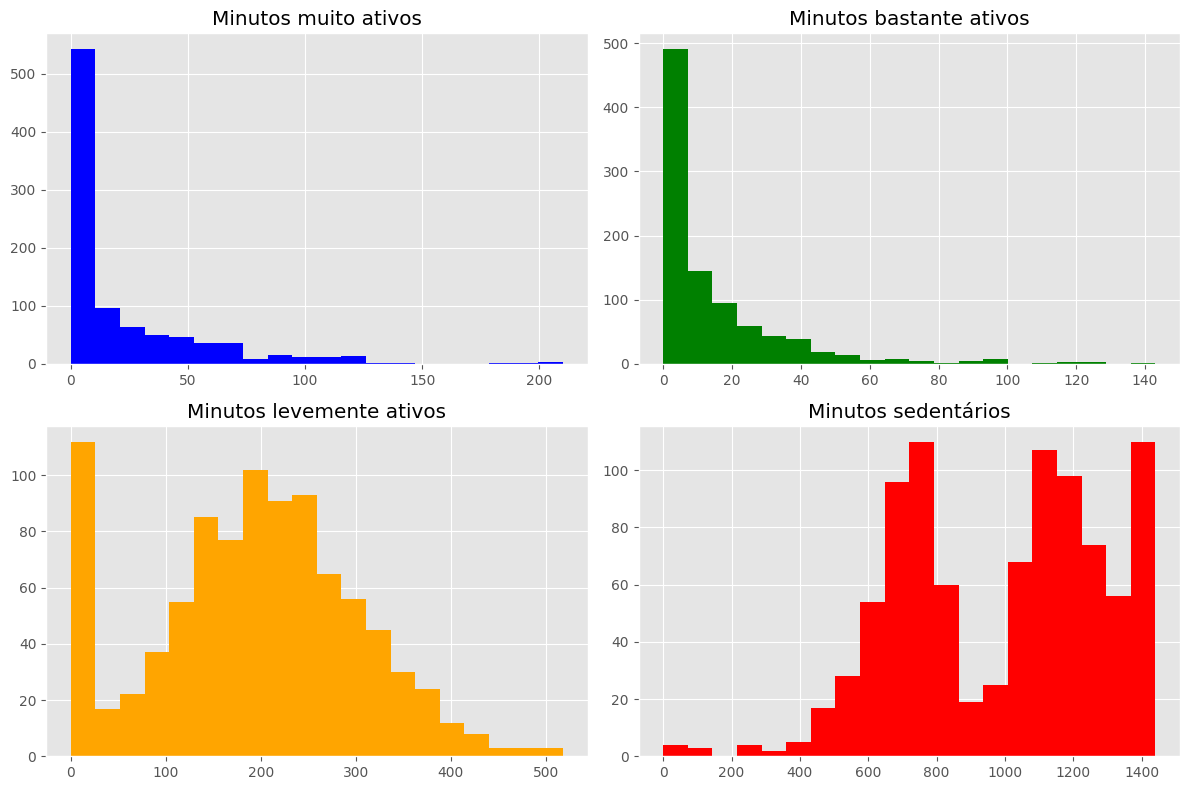

In [21]:
# Create a chart with 2 rows and 2 columns of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Customizing
colors = ['blue', 'green', 'orange', 'red']

# Plot the histograms on each subplot
axs[0, 0].hist(df['very_active_minutes'], bins=20, color=colors[0])
axs[0, 0].set_title('Minutos muito ativos')

axs[0, 1].hist(df['fairly_active_minutes'], bins=20, color=colors[1])
axs[0, 1].set_title('Minutos bastante ativos')

axs[1, 0].hist(df['lightly_active_minutes'], bins=20, color=colors[2])
axs[1, 0].set_title('Minutos levemente ativos')

axs[1, 1].hist(df['sedentary_minutes'], bins=20, color=colors[3])
axs[1, 1].set_title('Minutos sedentários')

# Adjust the layout and display the graphic
plt.tight_layout()
plt.show()

**Minutos muito ativos e bastante ativos**

É possível observar que a cauda à direita implica que poucas pessoas se dedicam a realizar esses tipos de atividade física mais intensa. Havendo uma variabilidade significativa nesse grupo.

**Minutos levemente ativos**

O histograma dessa variável apresenta uma distribuição mais ampla, com um pico central e cauda mais longa à direita. Ou seja, as pessoas variam bastante na quantidade de tempo deidicado à atividades de baixa intensidade.

Comparado aos gráficos anteriores, as pessoas tendem a praticar mais atividades leves do que a atividades moderadas ou intensas.

**Minutos sedentários**

A distruibuição de minutos sendetários se concentra em valores mais altos. Isso pode significar que a maioria das pessoas são sedentárias pois passam muitos minutos sem realizar atividades físicas. 

### Comparação das atividades físicas ao longo do tempo

In [22]:
# Checking the first and last records
print(f"First date: {df['activity_date'].min()}")
print(f"Last date: {df['activity_date'].max()}")

First date: 2016-04-12 00:00:00
Last date: 2016-05-12 00:00:00


At first sight, the period is one month.

In [23]:
# Grouping by week and agg the 'very_active_minutes'
week_data = df.groupby(pd.Grouper(key='activity_date', freq="W")).agg({'very_active_minutes': 'sum', 'fairly_active_minutes': 'sum', 'lightly_active_minutes': 'sum', 'sedentary_minutes': 'sum'})
print(week_data)

               very_active_minutes  fairly_active_minutes  \
activity_date                                               
2016-04-17                    4227                   2206   
2016-04-24                    5237                   3379   
2016-05-01                    4702                   3083   
2016-05-08                    3885                   2787   
2016-05-15                    1844                   1296   

               lightly_active_minutes  sedentary_minutes  
activity_date                                             
2016-04-17                      37748             198314  
2016-04-24                      44518             225771  
2016-05-01                      43738             218986  
2016-05-08                      38641             202371  
2016-05-15                      16599              86296  


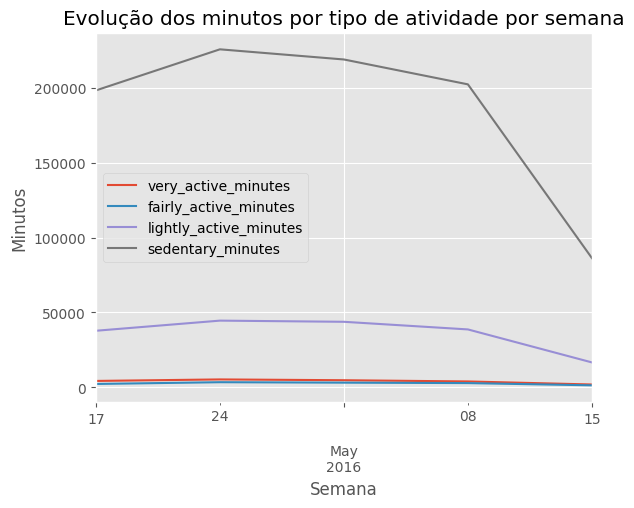

In [24]:
# Plotando um gráfico de linhas com múltiplas linhas
week_data.plot(kind='line')
plt.xlabel('Semana')
plt.ylabel('Minutos')
plt.title('Evolução dos minutos por tipo de atividade por semana')
plt.show()

Confirmando o que foi observado com os histogramas, há muitas pessoas não realizando atividades. Comparando àquelas que realizam algum nível de atividade física, maior parte prefere fazer exerícios de baixa intensidade.